In [1121]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score
import xgboost as xgb
import os

In [1122]:
from tqdm import tqdm
import time

In [1123]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir_path = '/content/gdrive/My Drive/BTP/data'

In [ ]:
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep='\t', header=None)

**DATA ACQUISITION**

In [ ]:
pressureFile1 = get_files(dir_path=dir_path, filename='PS1.txt')
pressureFile2 = get_files(dir_path=dir_path, filename='PS2.txt')
pressureFile2f[900]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2200    0.0
2201    0.0
2202    0.0
2203    0.0
2204    0.0
Name: 900, Length: 2205, dtype: float64

In [ ]:
pressureFile2f = pd.DataFrame()
i=900
while i<1076:
  ass=str(i-900)
  pressureFile2f=pd.concat([pressureFile2f, pressureFile2[i]], axis=1)
  i=i+1
pressureFile2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5960,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,125.50,125.39,125.40,125.03,124.05,123.18,104.01,56.500,23.992,18.406,15.648,13.969,12.719,11.578,10.508,9.578,8.766,8.039,7.367,6.766,6.266,5.797,5.383,5.000,4.625,4.352,4.086,3.828,3.602,3.391,3.250,3.055,2.898,2.758,2.578,2.469,2.367,2.242,2.148,2.070,...,125.22,125.27,125.34,125.30,125.12,125.04,125.11,125.12,125.08,125.08,125.18,125.21,125.13,125.08,125.16,125.19,125.10,125.03,125.03,125.22,125.34,125.18,125.09,125.10,125.16,125.23,125.23,125.19,125.19,125.16,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,125.06,125.08,125.09,124.69,123.84,123.14,103.63,63.687,28.359,21.711,18.531,16.375,15.070,13.695,12.477,11.266,10.367,9.445,8.633,7.906,7.250,6.586,6.008,5.539,5.156,4.836,4.477,4.141,3.883,3.641,3.414,3.211,3.047,2.898,2.781,2.633,2.547,2.484,2.391,2.273,...,125.08,125.09,125.08,125.04,125.06,125.09,125.06,124.96,124.92,125.06,125.18,124.96,124.84,124.92,125.01,125.09,125.16,125.11,125.11,125.19,125.10,125.10,125.16,125.12,124.98,124.85,124.88,124.94,124.96,124.88,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,125.13,125.27,125.23,124.74,123.94,123.23,106.35,60.516,26.258,19.258,16.125,14.352,12.977,11.734,10.664,9.695,8.789,8.062,7.367,6.680,6.117,5.641,5.180,4.766,4.367,4.016,3.750,3.539,3.305,3.094,2.914,2.766,2.633,2.484,2.328,2.219,2.164,2.062,1.984,1.953,...,124.75,124.75,124.71,124.61,124.63,124.74,124.69,124.55,124.61,124.79,124.83,124.67,124.57,124.63,124.69,124.75,124.65,124.66,124.77,124.84,124.84,124.84,124.90,124.88,124.74,124.64,124.66,124.74,124.77,124.64,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,124.93,124.96,124.92,124.41,123.60,122.88,103.99,58.859,27.781,21.469,18.328,15.953,13.891,12.141,10.617,9.328,8.250,7.328,6.477,5.750,5.156,4.656,4.195,3.797,3.508,3.250,2.992,2.781,2.609,2.453,2.250,2.109,2.031,1.930,1.852,1.773,1.672,1.562,1.461,1.406,...,124.61,124.49,124.38,124.44,124.49,124.49,124.55,124.64,124.74,124.82,124.73,124.63,124.69,124.65,124.55,124.44,124.48,124.62,124.57,124.49,124.49,124.62,124.69,124.61,124.51,124.52,124.61,124.65,124.63,124.69,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,124.72,124.74,124.66,124.31,123.57,122.74,105.94,62.648,30.875,23.883,20.555,18.344,16.461,14.812,13.344,12.039,10.820,9.727,8.820,8.039,7.266,6.609,6.039,5.516,5.070,4.664,4.289,3.977,3.703,3.469,3.266,3.055,2.875,2.719,2.586,2.469,2.344,2.242,2.133,2.039,...,124.69,124.57,124.49,124.56,124.57,124.52,124.49,124.54,124.64,124.65,124.59,124.64,124.77,124.67,124.45,124.38,124.43,124.52,124.53,124.45,124.47,124.56,124.52,124.48,124.45,124.47,124.48,124.36,124.43,124.67,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,125.47,125.63,125.70,125.34,124.94,124.88,113.56,71.586,34.516,25.531,21.297,18.219,15.703,13.656,11.859,10.250,8.914,7.805,6.836,6.008,5.289,4.664,4.172,3.773,3.406,3.055,2.797,2.562,2.320,2.141,1.984,1.883,1.820,1.680,1.516,1.414,1.328,1.258,1.203,1.156,...,125.84,125.73,125.60,125.65,125.73,125.73,125.66,125.65,125.73,125.76,125.77,125.74,125.73,125.79,125.76,125.66,125.73,125.81,125.70,125.56,125.55,125.61,125.60,125.50,125.41,125.49,125.60,125.48,125.44,125.53,125.57,125.51,125.38,125.43,125.59,125.61,125.53,125.50,125.60,125.73
2201,125.83,125.70,125.59,125.43,125.18,124.98,114.30,72.531,35.234,26.820,23.000,20.062,17.344,15.047,

In [1125]:
pressureFile1f = pd.DataFrame()
i=900
while i<1076:
  ass=str(i-900)
  pressureFile1f=pd.concat([pressureFile1f, pressureFile1[i]], axis=1)
  i=i+1
pressureFile1f

,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,...,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075
0,191.41,191.41,191.35,191.27,191.31,191.28,191.27,191.25,191.23,191.27,191.30,191.31,191.28,191.27,191.28,191.34,191.27,191.24,191.34,191.38,191.32,191.31,191.38,191.38,191.32,191.38,191.38,191.33,191.33,191.33,191.39,191.41,191.32,191.31,191.27,191.09,190.91,190.92,189.92,186.96,...,147.88,147.74,147.61,147.62,147.59,147.53,147.53,147.48,147.39,147.34,147.37,147.29,147.27,147.31,147.19,147.15,147.15,147.10,147.13,147.13,147.09,146.99,146.97,147.00,146.91,146.83,146.78,146.67,146.63,146.69,146.61,146.54,146.61,146.57,146.51,146.53,146.56,146.46,146.45,146.51
1,191.27,191.25,191.38,191.36,191.27,191.31,191.39,191.31,191.28,191.34,191.32,191.27,191.27,191.27,191.27,191.19,191.17,191.19,191.20,191.22,191.22,191.23,191.22,191.17,191.19,191.23,191.25,191.25,191.23,191.23,191.20,191.19,191.23,191.23,191.14,191.06,190.93,190.88,190.06,187.13,...,148.05,147.96,147.91,147.84,147.71,147.64,147.61,147.53,147.53,147.52,147.41,147.34,147.32,147.27,147.23,147.23,147.18,147.12,147.12,147.13,147.09,147.07,147.04,146.97,146.93,146.98,146.94,146.88,146.89,146.89,146.88,146.91,146.89,146.77,146.69,146.72,146.65,146.61,146.64,146.54
2,191.23,191.32,191.28,191.25,191.31,191.27,191.24,191.28,191.24,191.20,191.22,191.25,191.27,191.22,191.19,191.24,191.27,191.19,191.24,191.20,191.08,191.11,191.13,191.12,191.09,191.09,191.11,191.08,191.08,191.08,191.09,191.08,191.04,191.06,191.06,191.02,190.93,190.88,190.27,187.21,...,147.52,147.43,147.48,147.47,147.32,147.27,147.29,147.17,147.07,147.06,146.94,146.88,146.91,146.96,146.91,146.86,146.80,146.67,146.72,146.77,146.69,146.69,146.70,146.59,146.52,146.62,146.56,146.40,146.42,146.40,146.32,146.37,146.41,146.29,146.24,146.27,146.18,146.20,146.29,146.19
3,191.11,191.09,191.08,191.13,191.11,191.01,191.09,191.15,191.09,191.06,191.08,191.15,191.19,191.16,191.19,191.23,191.19,191.16,191.22,191.23,191.15,191.12,191.19,191.15,191.16,191.27,191.22,191.11,191.09,191.11,191.06,191.02,191.03,191.08,191.03,190.94,190.84,190.52,189.77,187.07,...,147.20,147.10,147.15,147.13,147.06,147.08,147.00,146.93,146.88,146.83,146.80,146.74,146.69,146.61,146.62,146.65,146.59,146.54,146.42,146.33,146.27,146.29,146.35,146.26,146.23,146.27,146.22,146.21,146.30,146.21,146.11,146.13,146.05,146.02,146.16,146.18,146.10,146.13,146.13,146.06
4,191.06,191.02,191.08,191.12,191.06,191.03,191.09,191.09,191.06,191.12,191.16,191.12,191.09,191.09,191.12,191.12,191.19,191.22,191.12,191.08,191.15,191.24,191.23,191.14,191.15,191.22,191.15,191.09,191.16,191.19,191.17,191.19,191.16,191.12,191.08,191.00,190.93,190.84,190.28,187.20,...,147.02,147.02,147.02,146.94,146.88,146.86,146.70,146.65,146.69,146.62,146.52,146.51,146.44,146.35,146.39,146.35,146.21,146.20,146.19,146.09,146.13,146.20,146.09,146.02,146.07,146.02,146.02,146.09,146.02,145.91,145.94,145.92,145.88,145.94,145.88,145.75,145.77,145.84,145.83,145.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,191.35,191.38,191.35,191.32,191.38,191.41,191.43,191.47,191.51,191.52,191.48,191.49,191.55,191.57,191.55,191.56,191.56,191.58,191.57,191.57,191.58,191.58,191.56,191.44,191.49,191.58,191.48,191.49,191.52,191.48,191.48,191.49,191.51,191.47,191.38,191.24,191.04,191.01,190.95,190.79,...,147.86,147.91,147.91,147.75,147.72,147.72,147.61,147.56,147.66,147.56,147.47,147.58,147.52,147.48,147.54,147.48,147.40,147.50,147.52,147.39,147.40,147.52,147.44,147.41,147.40,147.37,147.43

In [ ]:
diffPS=pressureFile1-pressureFile2

In [ ]:
diffPS[900].values

array([191.41, 191.27, 191.23, ..., 191.56, 191.52, 191.47])

In [ ]:
profile = get_files(dir_path=dir_path, filename='profile.txt')
y = pd.DataFrame(profile.iloc[:, 1])

In [ ]:
y[1].unique()

array([100,  73,  80,  90])

In [ ]:
pressureFile1.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5960,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
2202,151.73,151.78,151.84,151.62,151.46,151.49,153.91,154.88,153.69,154.24,154.88,155.63,156.31,156.90,157.58,158.21,158.71,159.35,160.05,160.69,161.29,161.90,162.56,163.22,163.84,164.56,165.30,165.84,166.46,167.26,167.99,168.62,169.36,170.09,170.65,171.32,172.18,173.02,173.69,174.34,...,151.79,151.73,151.67,151.71,151.70,151.68,151.78,151.78,151.66,151.69,151.81,151.78,151.77,151.79,151.70,151.64,151.73,151.75,151.66,151.70,151.73,151.65,151.68,151.75,151.71,151.69,151.71,151.63,151.62,151.75,151.73,151.66,151.73,151.71,151.68,151.79,151.84,151.73,151.73,151.83
2203,151.77,151.77,151.75,151.56,151.47,151.57,154.09,154.80,153.45,154.21,154.91,155.71,156.35,156.84,157.49,158.17,158.76,159.38,159.88,160.59,161.23,161.77,162.47,163.20,163.76,164.41,165.24,165.86,166.44,167.23,167.98,168.66,169.34,170.03,170.77,171.46,172.14,172.96,173.76,174.39,...,151.71,151.70,151.68,151.69,151.79,151.78,151.67,151.69,151.73,151.66,151.77,151.89,151.79,151.88,151.98,151.87,151.84,151.91,151.84,151.78,151.84,151.84,151.81,151.84,151.78,151.75,151.81,151.78,151.75,151.75,151.75,151.71,151.68,151.71,151.73,151.75,151.71,151.68,151.71,151.78
2204,151.83,151.78,151.77,151.65,151.49,151.48,154.00,154.77,153.48,154.29,154.98,155.66,156.38,157.00,157.49,158.14,158.81,159.35,160.02,160.74,161.32,161.88,162.59,163.30,163.94,164.58,165.27,165.96,166.59,167.23,168.05,168.77,169.33,170.07,170.87,171.57,172.27,173.07,173.81,174.41,...,151.64,151.65,151.69,151.64,151.69,151.76,151.66,151.67,151.73,151.67,151.70,151.81,151.78,151.73,151.73,151.69,151.67,151.76,151.71,151.64,151.70,151.71,151.66,151.68,151.70,151.65,151.63,151.68,151.75,151.69,151.70,151.71,151.63,151.64,151.67,151.64,151.70,151.73,151.71,151.70


In [ ]:
pressureFile2.head(3)
pressureFile1.iloc[0].values

array([151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19])

In [ ]:
y[(y[1]==100)].value_counts()

1  
100    1125
dtype: int64

In [ ]:
y[(y[1]==73)].value_counts()

1 
73    360
dtype: int64

In [ ]:
y[(y[1]==80)].value_counts()

1 
80    360
dtype: int64

In [ ]:
y[(y[1]==90)].value_counts()

1 
90    360
dtype: int64

**DATA VISUALIZATION**

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(25)

<Figure size 2160x1800 with 0 Axes>

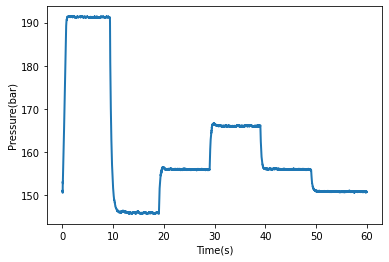

<Figure size 1080x720 with 0 Axes>

In [1170]:
plt.ylabel('Pressure(bar)', fontsize=10)
plt.xlabel('Time(s)', fontsize=10)
plt.plot(pressureFile1.iloc[1],  linewidth=2) # blue=100%
plt.xticks(range(0,6001,1000), range(0,61,10))
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
#plt.plot(pressureFile1.iloc[1], linewidth=0.75)


In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
#plt.plot(pressureFile1.iloc[1], linewidth=0.75)# blue=100%
#plt.plot(pressureFile1.iloc[212], linewidth=0.75) #orange=73%

<Figure size 1080x720 with 0 Axes>

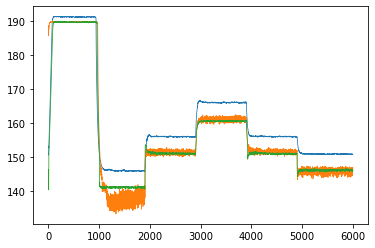

In [ ]:
plt.plot(pressureFile1.iloc[1], linewidth=0.75)# blue=100%
plt.plot(pressureFile1.iloc[212], linewidth=0.75) #orange=73%
plt.plot(pressureFile1.iloc[222], linewidth=0.75) #green=80%

1083.75

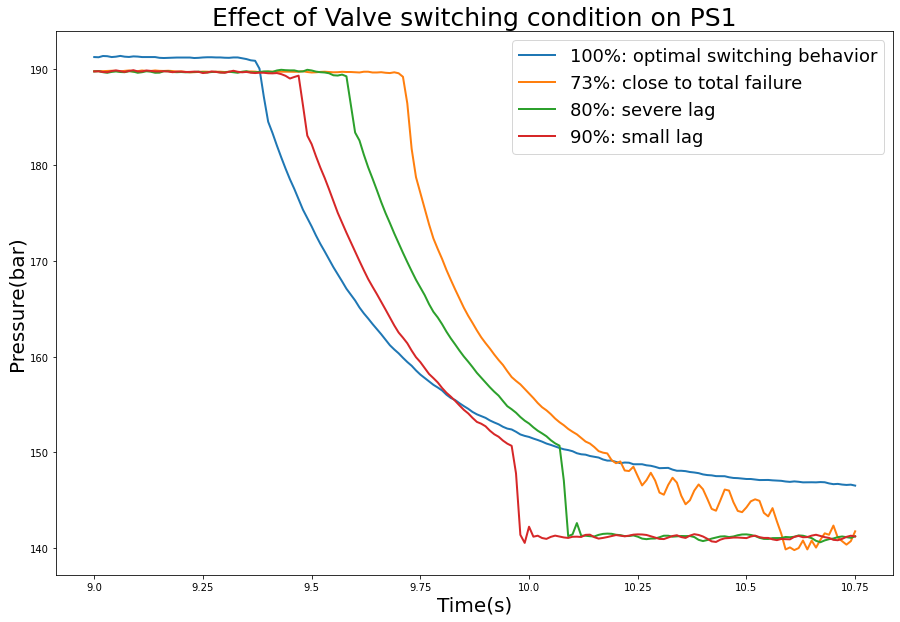

In [1165]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(pressureFile1f.iloc[1], linewidth=2)# blue=100%
plt.plot(pressureFile1f.iloc[212], linewidth=2) #orange=73%
plt.plot(pressureFile1f.iloc[222], linewidth=2) #green=80%
plt.plot(pressureFile1f.iloc[232], linewidth=2) #red=90%
plt.title('Effect of Valve switching condition on PS1', fontsize=25)
plt.ylabel('Pressure(bar)', fontsize=20)
plt.xlabel('Time(s)', fontsize=20)
plt.xticks(range(900,1076,25), np.arange(9,11,0.25))
plt.legend(['100%: optimal switching behavior', '73%: close to total failure', '80%: severe lag', '90%: small lag'], fontsize=18)
xmax

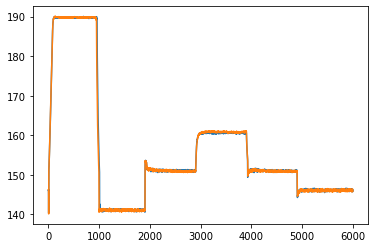

In [ ]:
plt.plot(pressureFile1.iloc[222]) #green=80%
plt.plot(pressureFile1.iloc[232])

([<matplotlib.axis.XTick at 0x7f53642f68d0>,
 [Text(0, 0, '0'),
  Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '30'),
  Text(0, 0, '40'),
  Text(0, 0, '50'),
  Text(0, 0, '60')])

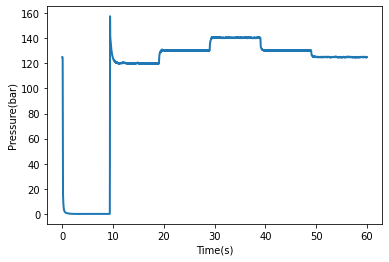

In [1172]:
#plt.plot(pressureFile2.iloc[1])# blue=100%
plt.ylabel('Pressure(bar)', fontsize=10)
plt.xlabel('Time(s)', fontsize=10)
plt.plot(pressureFile2.iloc[1],  linewidth=2) # blue=100%
plt.xticks(range(0,6001,1000), range(0,61,10))

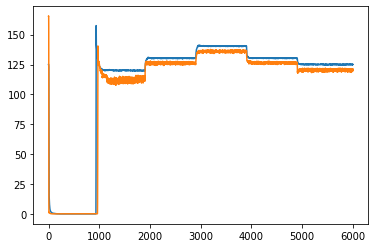

In [ ]:
plt.plot(pressureFile2.iloc[1])# blue=100%
plt.plot(pressureFile2.iloc[212]) #orange=73%

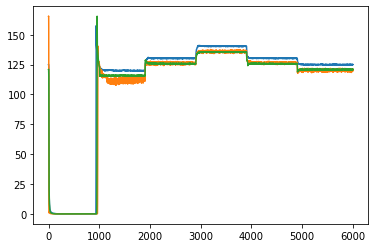

In [ ]:
plt.plot(pressureFile2.iloc[1])# blue=100%
plt.plot(pressureFile2.iloc[212]) #orange=73%
plt.plot(pressureFile2.iloc[222]) #green=80%

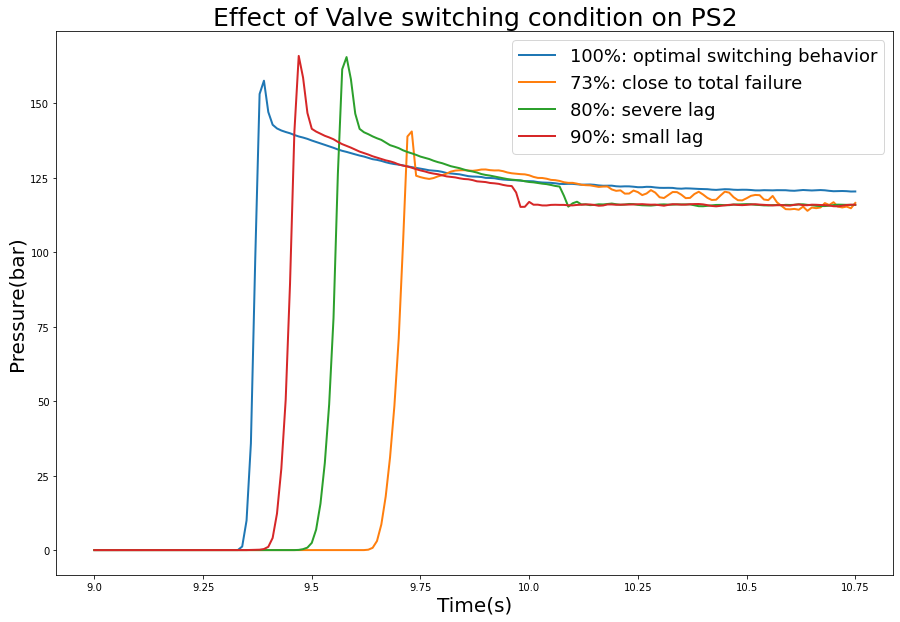

In [1166]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.title('Effect of Valve switching condition on PS2', fontsize=25)
plt.plot(pressureFile2f.iloc[1], linewidth=2)# blue=100%
plt.plot(pressureFile2f.iloc[212], linewidth=2) #orange=73%
plt.plot(pressureFile2f.iloc[222], linewidth=2) #green=80%
plt.plot(pressureFile2f.iloc[232], linewidth=2) #red=90%
plt.ylabel('Pressure(bar)', fontsize=20)
plt.xlabel('Time(s)', fontsize=20)
plt.xticks(range(900,1076,25), np.arange(9,11,0.25))
plt.legend(['100%: optimal switching behavior', '73%: close to total failure', '80%: severe lag', '90%: small lag'], fontsize=18)

([<matplotlib.axis.XTick at 0x7f53645f0550>,
 [Text(0, 0, '0'),
  Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '30'),
  Text(0, 0, '40'),
  Text(0, 0, '50'),
  Text(0, 0, '60')])

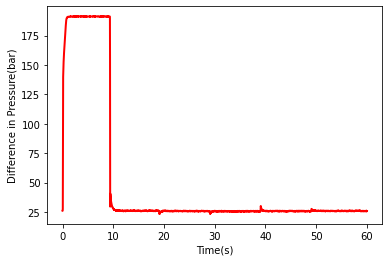

In [1174]:
plt.ylabel('Difference in Pressure(bar)', fontsize=10)
plt.xlabel('Time(s)', fontsize=10)
plt.plot(diffPS.iloc[1],  linewidth=2, color='red')
plt.xticks(range(0,6001,1000), range(0,61,10))

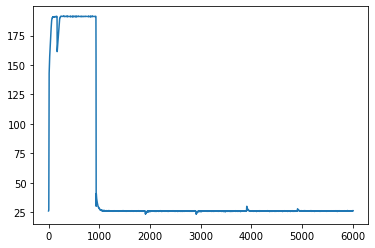

In [ ]:
p=pressureFile1.iloc[0]-pressureFile2.iloc[0].values
plt.plot(p)

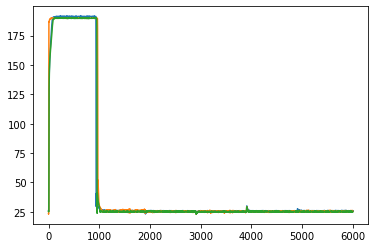

In [ ]:
plt.plot(diffPS.iloc[1])# blue=100%
plt.plot(diffPS.iloc[212]) #orange=73%
plt.plot(diffPS.iloc[222]) #green=80%

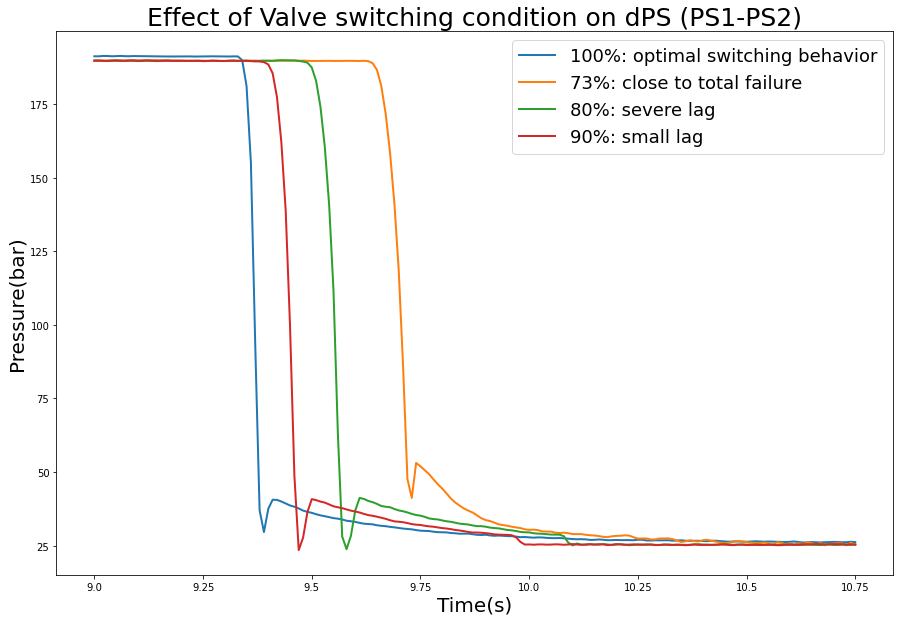

In [1167]:
pressureFile3f=pressureFile1f-pressureFile2f
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.title('Effect of Valve switching condition on dPS (PS1-PS2)', fontsize=25)
plt.plot(pressureFile3f.iloc[1], linewidth=2)# blue=100%
plt.plot(pressureFile3f.iloc[212], linewidth=2) #orange=73%
plt.plot(pressureFile3f.iloc[222], linewidth=2) #green=80%
plt.plot(pressureFile3f.iloc[232], linewidth=2) #red=90%
plt.ylabel('Pressure(bar)', fontsize=20)
plt.xlabel('Time(s)', fontsize=20)
plt.xticks(range(900,1076,25), np.arange(9,11,0.25))
plt.legend(['100%: optimal switching behavior', '73%: close to total failure', '80%: severe lag', '90%: small lag'], fontsize=18)

**FEATURE EXTRACTION**

STATISTICAL FEATURES

In [ ]:
def max_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.max(axis = 1)
    return df1

In [ ]:
def min_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.min(axis = 1)
    return df1

In [ ]:
#average the cycle data

def mean_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1

In [ ]:
def std_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.std(axis = 1)
    return df1

In [ ]:
def rms_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.power(df,2)).sum(axis=1))/df.count(axis=1)
    return df1

In [ ]:
def kur_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.kurtosis(axis = 1)
    return df1

In [ ]:
def ske_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.skew(axis = 1)
    return df1

In [ ]:
def cre_conversion(df): 
    df1 = pd.DataFrame()
    df1 = (np.absolute(df.max(axis = 1)))/(((np.power(df,2)).sum(axis = 1))/df.count(axis = 1))
    return df1

In [ ]:
def cle_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.absolute(df)).max(axis = 1))/np.power((((np.power((np.absolute(df)),0.5)).sum(axis = 1))/df.count(axis = 1)),2)
    return df1

In [ ]:
def sha_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ( np.power( ( (( np.power(df,2) ).sum(axis = 1)) /df.count(axis = 1)) ,2)) /df.mean(axis = 1)
    return df1

In [ ]:
def imp_conversion(df): 
    df1 = pd.DataFrame()
    a= (np.absolute(df)).max(axis = 1)
    b = ( (np.absolute(df)).sum(axis = 1) ) / (df.count(axis = 1))
    df1 = a / b
    return df1

In [ ]:
PS2_max = pd.DataFrame(max_conversion(pressureFile2))
PS2_max.columns = ['PS2_max']

PS1_max = pd.DataFrame(max_conversion(pressureFile1))
PS1_max.columns = ['PS1_max']
diffPS_max = pd.DataFrame(max_conversion(diffPS))
diffPS_max.columns = ['diffPS_max']

In [ ]:
PS2_min = pd.DataFrame(min_conversion(pressureFile2))
PS2_min.columns = ['PS2_min']

PS1_min = pd.DataFrame(min_conversion(pressureFile1))
PS1_min.columns = ['PS1_min']

diffPS_min = pd.DataFrame(min_conversion(diffPS))
diffPS_min.columns = ['diffPS_min']

In [ ]:
PS2_std = pd.DataFrame(std_conversion(pressureFile2))
PS2_std.columns = ['PS2_std']

PS1_std = pd.DataFrame(std_conversion(pressureFile1))
PS1_std.columns = ['PS1_std']

diffPS_std = pd.DataFrame(std_conversion(diffPS))
diffPS_std.columns = ['diffPS_std']

In [ ]:
PS2_rms = pd.DataFrame(rms_conversion(pressureFile2))
PS2_rms.columns = ['PS2_rms']

PS1_rms = pd.DataFrame(rms_conversion(pressureFile1))
PS1_rms.columns = ['PS1_rms']

diffPS_rms = pd.DataFrame(rms_conversion(diffPS))
diffPS_rms.columns = ['diffPS_rms']

In [ ]:
PS2_kur = pd.DataFrame(kur_conversion(pressureFile2))
PS2_kur.columns = ['PS2_kur']

PS1_kur = pd.DataFrame(kur_conversion(pressureFile1))
PS1_kur.columns = ['PS1_kur']

diffPS_kur = pd.DataFrame(kur_conversion(diffPS))
diffPS_kur.columns = ['diffPS_kur']

In [ ]:
PS2_ske = pd.DataFrame(ske_conversion(pressureFile2))
PS2_ske.columns = ['PS2_ske']

PS1_ske = pd.DataFrame(ske_conversion(pressureFile1))
PS1_ske.columns = ['PS1_ske']

diffPS_ske = pd.DataFrame(ske_conversion(diffPS))
diffPS_ske.columns = ['diffPS_ske']

In [ ]:
PS2_cre = pd.DataFrame(cre_conversion(pressureFile2))
PS2_cre.columns = ['PS2_cre']

PS1_cre = pd.DataFrame(cre_conversion(pressureFile1))
PS1_cre.columns = ['PS1_cre']

diffPS_cre = pd.DataFrame(cre_conversion(diffPS))
diffPS_cre.columns = ['diffPS_cre']

In [ ]:
PS2_cle = pd.DataFrame(cle_conversion(pressureFile2))
PS2_cle.columns = ['PS2_cle']

PS1_cle = pd.DataFrame(cle_conversion(pressureFile1))
PS1_cle.columns = ['PS1_cle']

diffPS_cle = pd.DataFrame(cle_conversion(diffPS))
diffPS_cle.columns = ['diffPS_cle']

In [ ]:
PS2_sha = pd.DataFrame(sha_conversion(pressureFile2))
PS2_sha.columns = ['PS2_sha']

PS1_sha = pd.DataFrame(sha_conversion(pressureFile1))
PS1_sha.columns = ['PS1_sha']

diffPS_sha = pd.DataFrame(sha_conversion(diffPS))
diffPS_sha.columns = ['diffPS_sha']

In [ ]:
PS2_imp = pd.DataFrame(imp_conversion(pressureFile2))
PS2_imp.columns = ['PS2_imp']

PS1_imp = pd.DataFrame(imp_conversion(pressureFile1))
PS1_imp.columns = ['PS1_imp']

diffPS_imp = pd.DataFrame(imp_conversion(diffPS))
diffPS_imp.columns = ['diffPS_imp']

In [ ]:
PS2_mean = pd.DataFrame(mean_conversion(pressureFile2))
PS2_mean.columns = ['PS2_mean']

PS1_mean = pd.DataFrame(mean_conversion(pressureFile1))
PS1_mean.columns = ['PS1_mean']

diffPS_mean = pd.DataFrame(mean_conversion(diffPS))
diffPS_mean.columns = ['diffPS_mean']

In [ ]:
dPS=pd.concat([diffPS_mean,diffPS_imp,diffPS_sha,diffPS_cle,diffPS_cre,diffPS_ske,diffPS_kur,diffPS_rms,diffPS_std,diffPS_min,diffPS_max], axis=1)

In [ ]:
PS1 = pd.concat([PS1_mean, PS1_max, PS1_min, PS1_ske, PS1_kur, PS1_std, PS1_rms,PS1_imp, PS1_sha, PS1_cre, PS1_cle], axis=1)

In [ ]:
PS2 = pd.concat([PS2_mean, PS2_max, PS2_min, PS2_ske, PS2_kur, PS2_std, PS2_rms,PS2_imp, PS2_sha, PS2_cre, PS2_cle], axis=1)
PS2.head(2)

,PS2_mean,PS2_max,PS2_min,PS2_ske,PS2_kur,PS2_std,PS2_rms,PS2_imp,PS2_sha,PS2_cre,PS2_cle
0,109.466914,156.99,0.0,-1.838312,1.511113,47.114508,14202.412025,1.434132,1.842644e+06,0.011054,1.687403
1,109.354890,157.56,0.0,-1.838811,1.513347,47.045611,14171.412675,1.440813,1.836488e+06,0.011118,1.694697


**DATA NORMALIZATION/STANDARDIZATION**

In [ ]:

dPS_sta = pd.DataFrame(MinMaxScaler().fit_transform(dPS))
dPS_sta.columns=["diffPS_mean","diffPS_imp","diffPS_sha","diffPS_cle","diffPS_cre","diffPS_ske","diffPS_kur","diffPS_rms","diffPS_std","diffPS_min","diffPS_max"]
PS1_sta = pd.DataFrame(MinMaxScaler().fit_transform(PS1))
PS1_sta.columns=["PS1_mean", "PS1_max", "PS1_min", "PS1_ske", "PS1_kur", "PS1_std", "PS1_rms","PS1_imp", "PS1_sha", "PS1_cre", "PS1_cle"]
PS2_sta = pd.DataFrame(MinMaxScaler().fit_transform(PS2))
PS2_sta.columns=["PS2_mean", "PS2_max", "PS2_min", "PS2_ske", "PS2_kur", "PS2_std", "PS2_rms","PS2_imp", "PS2_sha", "PS2_cre", "PS2_cle"]
PS2_sta.head(2)
PS2['PS2_min'].min()

0.0

In [ ]:
#Normalization
dPS_nor = pd.DataFrame(MinMaxScaler().fit_transform(dPS))
dPS_nor.columns=["diffPS_mean","diffPS_imp","diffPS_sha","diffPS_cle","diffPS_cre","diffPS_ske","diffPS_kur","diffPS_rms","diffPS_std","diffPS_min","diffPS_max"]
PS1_nor = pd.DataFrame(MinMaxScaler().fit_transform(PS1))
PS1_nor.columns=["PS1_mean", "PS1_max", "PS1_min", "PS1_ske", "PS1_kur", "PS1_std", "PS1_rms","PS1_imp", "PS1_sha", "PS1_cre", "PS1_cle"]
PS2_nor = pd.DataFrame(MinMaxScaler().fit_transform(PS2))
PS2_nor.columns=["PS2_mean", "PS2_max", "PS2_min", "PS2_ske", "PS2_kur", "PS2_std", "PS2_rms","PS2_imp", "PS2_sha", "PS2_cre", "PS2_cle"]
PS2_nor.head(2)

,PS2_mean,PS2_max,PS2_min,PS2_ske,PS2_kur,PS2_std,PS2_rms,PS2_imp,PS2_sha,PS2_cre,PS2_cle
0,0.186170,0.153181,0.0,0.008556,0.987509,0.132965,0.154604,0.532442,0.134728,0.647950,0.496866
1,0.182048,0.197958,0.0,0.007607,0.989601,0.128163,0.150628,0.553088,0.131037,0.661557,0.515675


In [ ]:
y[1].iloc[1500]

100

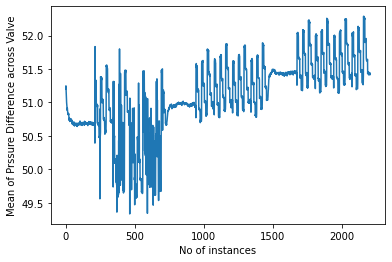

In [ ]:
#plt.title('Effect of Valve condition on dPS (PS1-PS2)', fontsize=25)
plt.ylabel('Mean of Prssure Difference across Valve')
plt.xlabel('No of instances')
plt.plot(dPS.diffPS_mean)

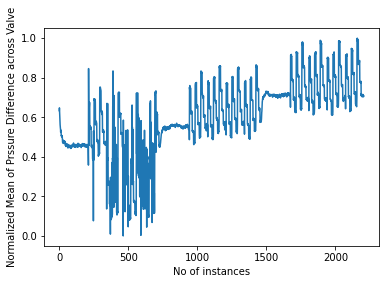

In [ ]:
plt.ylabel('Normalized Mean of Prssure Difference across Valve')
plt.xlabel('No of instances')
plt.plot(dPS_sta.diffPS_mean)

**FEATURE RANKING**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


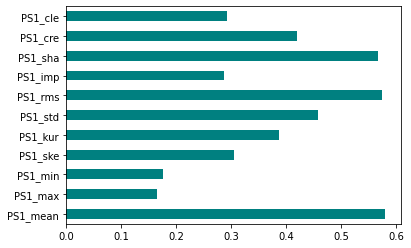

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances= mutual_info_classif(PS1_sta, y)
feat_importances=pd.Series(importances, PS1_sta.columns[0:len(PS1_sta.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


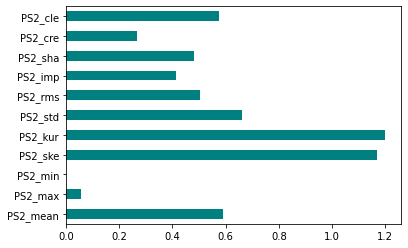

In [ ]:
importances= mutual_info_classif(PS2_sta, y)
feat_importances=pd.Series(importances, PS2_sta.columns[0:len(PS2_sta.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


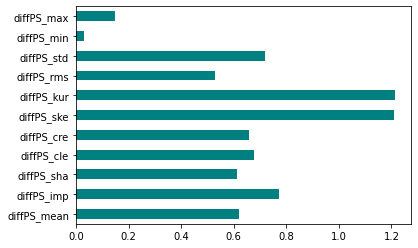

In [ ]:
importances= mutual_info_classif(dPS_sta, y)
feat_importances=pd.Series(importances, dPS_sta.columns[0:len(dPS_sta.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
X=pd.concat([dPS_sta, PS2_sta, PS1_sta], axis=1)
X.head()

,diffPS_mean,diffPS_imp,diffPS_sha,diffPS_cle,diffPS_cre,diffPS_ske,diffPS_kur,diffPS_rms,diffPS_std,diffPS_min,diffPS_max,PS2_mean,PS2_max,PS2_min,PS2_ske,PS2_kur,PS2_std,PS2_rms,PS2_imp,PS2_sha,PS2_cre,PS2_cle,PS1_mean,PS1_max,PS1_min,PS1_ske,PS1_kur,PS1_std,PS1_rms,PS1_imp,PS1_sha,PS1_cre,PS1_cle
0,0.633576,0.384395,0.280138,0.250599,0.691166,0.976133,0.972333,0.401367,0.172891,0.803738,0.841629,0.186170,0.153181,0.0,0.008556,0.987509,0.132965,0.154604,0.532442,0.134728,0.647950,0.496866,0.206882,0.820961,0.936578,0.950061,0.765489,0.001418,0.188312,0.828099,0.174634,0.791792,0.824451
1,0.647733,0.365738,0.378030,0.251900,0.614029,0.967428,0.956739,0.469567,0.273605,0.728972,0.828054,0.182048,0.197958,0.0,0.007607,0.989601,0.128163,0.150628,0.553088,0.131037,0.661557,0.515675,0.204134,0.803493,0.929204,0.951818,0.754285,0.023290,0.186290,0.829692,0.172900,0.793483,0.826371
2,0.627587,0.383013,0.374791,0.273830,0.621489,0.958465,0.947169,0.458802,0.280834,0.822430,0.805430,0.174836,0.151610,0.0,0.009142,0.987158,0.124430,0.144488,0.544382,0.125575,0.660693,0.511456,0.194123,0.777293,0.902655,0.953113,0.755538,0.032256,0.177056,0.838641,0.164216,0.803577,0.835502
3,0.605398,0.400590,0.368717,0.295891,0.630176,0.957550,0.946617,0.445357,0.285993,0.728972,0.773756,0.171377,0.109976,0.0,0.009952,0.986345,0.123047,0.141617,0.533198,0.123046,0.656480,0.506239,0.187870,0.746725,0.885693,0.954204,0.757598,0.036540,0.171262,0.843053,0.158763,0.809324,0.840008
4,0.587049,0.427997,0.342241,0.318271,0.663153,0.970843,0.962163,0.420664,0.266589,0.598131,0.805430,0.166470,0.242734,0.0,0.009235,0.988324,0.116266,0.136717,0.586563,0.118463,0.688237,0.551756,0.180522,0.777293,0.871681,0.956060,0.761145,0.042460,0.164484,0.853831,0.152398,0.818986,0.850915


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


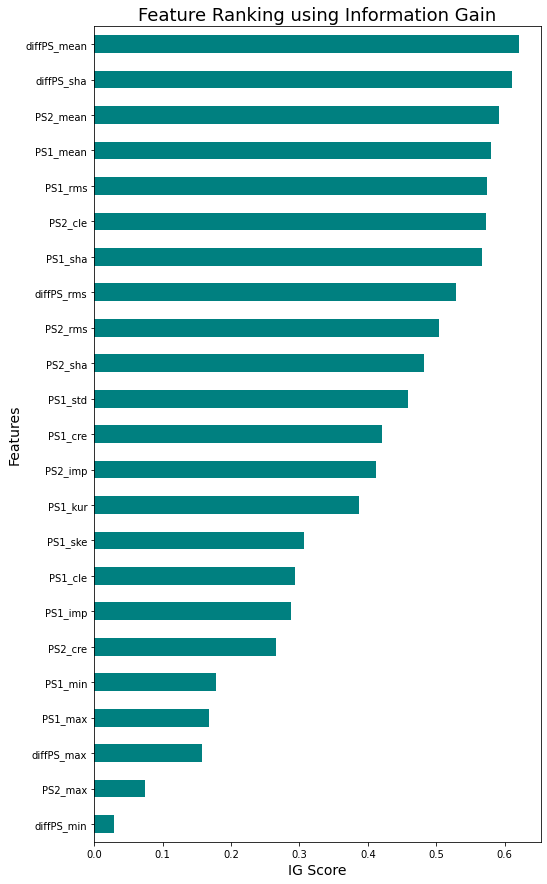

In [1175]:
importances= mutual_info_classif(X, y)
feat_importances=pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances=feat_importances.sort_values(ascending=True)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(15)
plt.title('Feature Ranking using Information Gain', fontsize=18)
plt.ylabel('Features', fontsize=14)
plt.xlabel('IG Score', fontsize=14)
feat_importances[0:23].plot(kind='barh', color='teal')
plt.show()

In [ ]:
feat_importances=feat_importances.sort_values(ascending=False)
feat_importances[0:23]

diffPS_kur     1.213931
diffPS_ske     1.210077
PS2_kur        1.198867
PS2_ske        1.169626
diffPS_imp     0.772817
diffPS_std     0.717376
diffPS_cle     0.677666
PS2_std        0.663188
diffPS_cre     0.658597
diffPS_mean    0.621402
diffPS_sha     0.610661
PS2_mean       0.591373
PS1_mean       0.580035
PS1_rms        0.574629
PS2_cle        0.573172
PS1_sha        0.567485
diffPS_rms     0.528930
PS2_rms        0.504190
PS2_sha        0.482330
PS1_std        0.458888
PS1_cre        0.420172
PS2_imp        0.411511
PS1_kur        0.386662
dtype: float64

In [ ]:
X_dig= pd.concat([dPS_sta.diffPS_mean  ,
dPS_sta.diffPS_imp    ,
dPS_sta.diffPS_sha    ,
dPS_sta.diffPS_cle   ,
dPS_sta.diffPS_cre    ,
dPS_sta.diffPS_ske    ,
dPS_sta.diffPS_kur     ,
dPS_sta.diffPS_rms    ,
dPS_sta.diffPS_std   ,
PS2_sta.PS2_ske       ,
PS2_sta.PS2_kur,       # 1.231715
PS2_sta.PS2_cle ,       #1.224903
PS1_sta.PS1_ske  ,  #    1.209421
PS2_sta.PS2_imp   ,  #   1.180450
PS2_sta.PS2_std    ,  #  1.162056
PS1_sta.PS1_kur     ,  # 1.145341
PS2_sta.PS2_mean     ,  #1.131186
PS1_sta.PS1_imp,  #      0.910404
PS1_sta.PS1_cle ,  #     0.896961
PS2_sta.PS2_cre  ,  #    0.880949
PS1_sta.PS1_cre   ,  #   0.874236
PS2_sta.PS2_rms    ,  #  0.845554
PS1_sta.PS1_sha], axis=1)

In [ ]:
X_IG=pd.concat([dPS_sta.diffPS_kur ,    
dPS_sta.diffPS_ske  ,   
PS2_sta.PS2_kur        ,
PS2_sta.PS2_ske      ,
dPS_sta.diffPS_imp     ,
dPS_sta.diffPS_std  ,   
dPS_sta.diffPS_cle   ,  
PS2_sta.PS2_std        ,
dPS_sta.diffPS_cre,     
dPS_sta.diffPS_mean,    
dPS_sta.diffPS_sha  , 
PS2_sta.PS2_mean       ,
PS1_sta.PS1_mean       ,
PS1_sta.PS1_rms        ,
PS2_sta.PS2_cle        ,
PS1_sta.PS1_sha        ,
dPS_sta.diffPS_rms,   
PS2_sta.PS2_rms       ,
PS2_sta.PS2_sha        ,
PS1_sta.PS1_std        ,
PS1_sta.PS1_cre      ,
PS2_sta.PS2_imp       ,
PS1_sta.PS1_kur       ,], axis=1)
X_IG.head()

,diffPS_kur,diffPS_ske,PS2_kur,PS2_ske,diffPS_imp,diffPS_std,diffPS_cle,PS2_std,diffPS_cre,diffPS_mean,diffPS_sha,PS2_mean,PS1_mean,PS1_rms,PS2_cle,PS1_sha,diffPS_rms,PS2_rms,PS2_sha,PS1_std,PS1_cre,PS2_imp,PS1_kur
0,0.972333,0.976133,0.987509,0.008556,0.384395,0.172891,0.250599,0.132965,0.691166,0.633576,0.280138,0.186170,0.206882,0.188312,0.496866,0.174634,0.401367,0.154604,0.134728,0.001418,0.791792,0.532442,0.765489
1,0.956739,0.967428,0.989601,0.007607,0.365738,0.273605,0.251900,0.128163,0.614029,0.647733,0.378030,0.182048,0.204134,0.186290,0.515675,0.172900,0.469567,0.150628,0.131037,0.023290,0.793483,0.553088,0.754285
2,0.947169,0.958465,0.987158,0.009142,0.383013,0.280834,0.273830,0.124430,0.621489,0.627587,0.374791,0.174836,0.194123,0.177056,0.511456,0.164216,0.458802,0.144488,0.125575,0.032256,0.803577,0.544382,0.755538
3,0.946617,0.957550,0.986345,0.009952,0.400590,0.285993,0.295891,0.123047,0.630176,0.605398,0.368717,0.171377,0.187870,0.171262,0.506239,0.158763,0.445357,0.141617,0.123046,0.036540,0.809324,0.533198,0.757598
4,0.962163,0.970843,0.988324,0.009235,0.427997,0.266589,0.318271,0.116266,0.663153,0.587049,0.342241,0.166470,0.180522,0.164484,0.551756,0.152398,0.420664,0.136717,0.118463,0.042460,0.818986,0.586563,0.761145


In [ ]:
X=pd.concat([dPS_sta.diffPS_kur ,    
dPS_sta.diffPS_ske  ,   
PS2_sta.PS2_kur        ,
PS2_sta.PS2_ske      ,
dPS_sta.diffPS_imp     ,
dPS_sta.diffPS_std  ,   
dPS_sta.diffPS_cle   ,  
PS2_sta.PS2_std        ,
dPS_sta.diffPS_cre,     
dPS_sta.diffPS_mean,    
dPS_sta.diffPS_sha  , 
PS2_sta.PS2_mean       ,
PS1_sta.PS1_mean       ,
PS1_sta.PS1_rms        ,
PS2_sta.PS2_cle        ,
PS1_sta.PS1_sha        ,
dPS_sta.diffPS_rms,   
PS2_sta.PS2_rms       ,
PS2_sta.PS2_sha        ,
PS1_sta.PS1_std        ,
PS1_sta.PS1_cre      ,
PS2_sta.PS2_imp       ,
PS1_sta.PS1_kur       ,
PS1_sta.PS1_ske      ,
PS1_sta.PS1_cle,
PS1_sta.PS1_imp      ,
PS2_sta.PS2_cre      ,
PS1_sta.PS1_min       , 
dPS_sta.diffPS_min    ,
PS1_sta.PS1_max      ,
PS2_sta.PS2_max       , 
dPS_sta.diffPS_max     ], axis=1)

Forward Feature Selection

In [ ]:
y[1].shape

(2205,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
efs= SequentialFeatureSelector(XGBClassifier(),forward=True, k_features=23 )
efs = efs.fit(X, y[1])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector
#efs= ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=24, max_features=25 )
#efs = efs.fit(X, y[1])

In [ ]:
features = list(efs.k_feature_names_)
features[0:23]

['diffPS_kur',
 'diffPS_ske',
 'PS2_kur',
 'PS2_ske',
 'diffPS_imp',
 'diffPS_std',
 'diffPS_cle',
 'PS2_std',
 'diffPS_cre',
 'diffPS_mean',
 'diffPS_sha',
 'PS2_mean',
 'PS1_mean',
 'PS1_rms',
 'PS1_sha',
 'diffPS_rms',
 'PS2_rms',
 'PS2_sha',
 'PS1_std',
 'PS1_cre',
 'PS1_kur',
 'PS1_ske',
 'PS1_imp']

In [ ]:
len(features)

23

In [752]:
X_FFS=pd.concat([dPS_sta['diffPS_kur'],
 dPS_sta['diffPS_ske'],
 PS2_sta['PS2_kur'],
 PS2_sta['PS2_ske'],
 dPS_sta['diffPS_imp'],
 dPS_sta['diffPS_std'],
 dPS_sta['diffPS_cle'],
 PS2_sta['PS2_std'],
 dPS_sta['diffPS_cre'],
 dPS_sta['diffPS_mean'],
 dPS_sta['diffPS_sha'],
 PS2_sta['PS2_mean'],
 PS1_sta['PS1_mean'],
 PS1_sta['PS1_rms'],
 #PS2_sta['PS2_cle'],
 PS1_sta['PS1_sha'],
 dPS_sta['diffPS_rms'],
 PS2_sta['PS2_rms'],
 PS2_sta['PS2_sha'],
 PS1_sta['PS1_std'],
 PS1_sta['PS1_cre'],
 PS1_sta['PS1_kur'],
 PS1_sta['PS1_ske'],
 PS1_sta.PS1_imp], axis=1)

In [753]:
X_FFS.shape

(2205, 23)

FEATURE SELLECTION

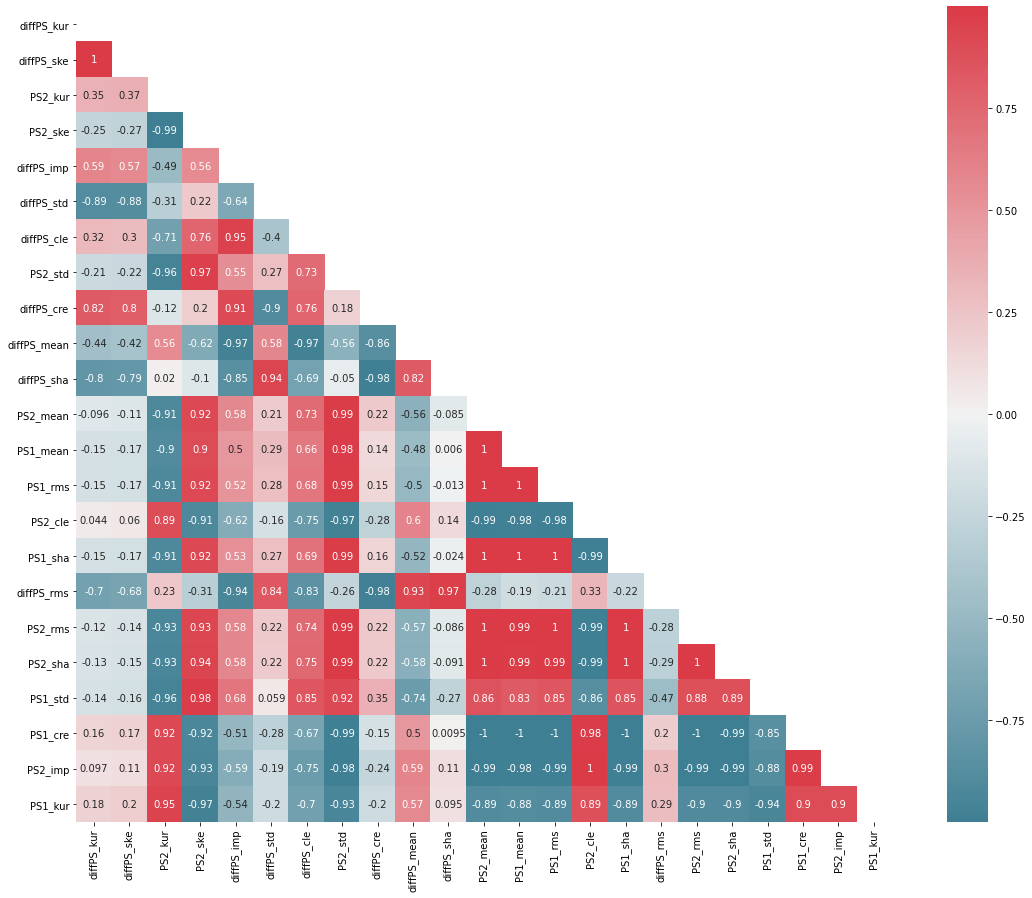

In [ ]:
corr_matrix = X_IG.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot= True,
            square=True)

In [ ]:
X_IG = X_IG.drop(['diffPS_ske',  'PS2_rms', 'PS1_cre', 'PS1_sha', 'PS2_sha'], axis=1)
X_IG.shape

(2205, 18)

In [ ]:
X_dig.columns

Index(['diffPS_mean', 'diffPS_kur', 'PS2_cle', 'PS1_ske', 'PS2_imp', 'PS2_std',
       'PS1_kur', 'PS2_mean', 'PS1_imp', 'PS1_cle', 'PS2_cre', 'PS1_cre',
       'PS2_rms', 'PS1_sha'],
      dtype='object')

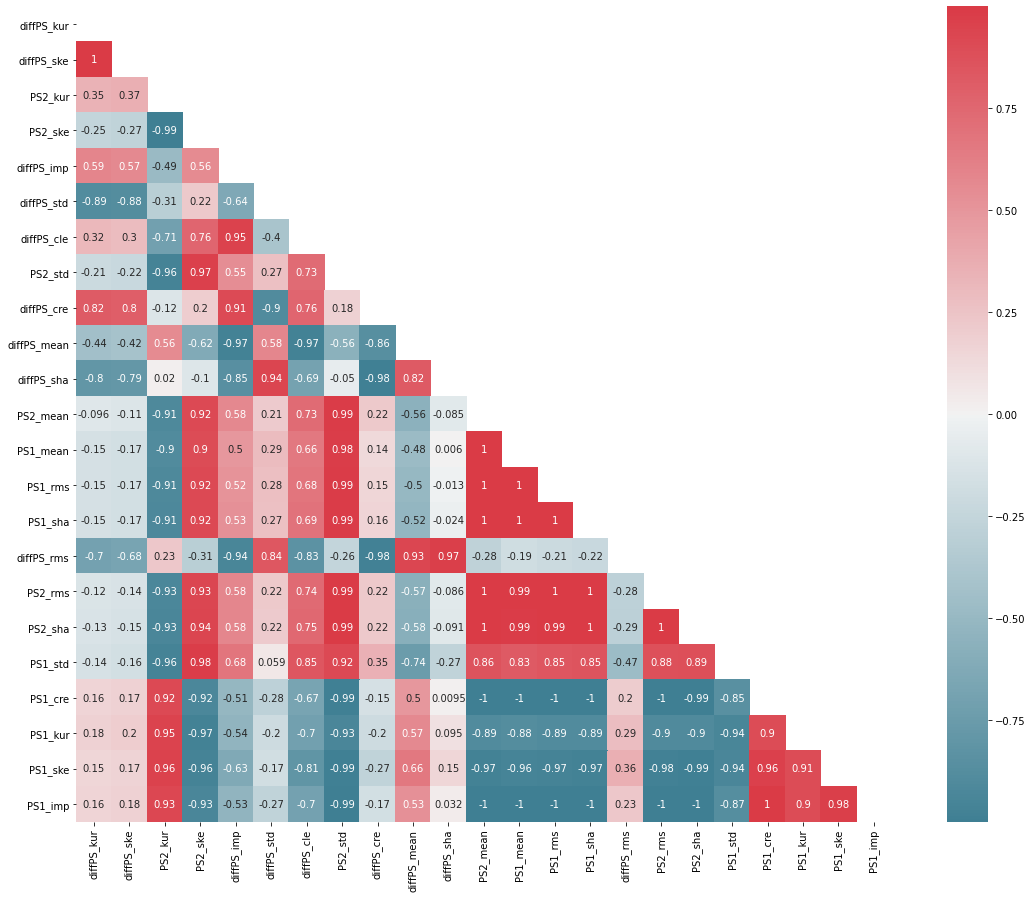

In [754]:
corr_matrix = X_FFS.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot= True,
            square=True)

In [755]:
#RCF--X_FFS = X_FFS.drop(['diffPS_ske', 'PS2_rms', 'PS2_sha', 'PS1_cre', 'PS2_imp'], axis=1)
X_FFS = X_FFS.drop([ 'diffPS_ske','PS2_rms', 'PS2_sha', 'PS1_cre', 'PS1_imp'], axis=1)
X_FFS.shape

(2205, 18)

In [683]:
X_FFS.shape

(2205, 18)

**ENSEMBLE MACHINE LEARNING ALGORITHMS FOR CLASSICATION**

RANDOM FOREST CLASSIFIER

In [993]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [994]:
FFSseed = 20
num_trees = 80
max_features = 17
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_FFS, y,  cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.999 (0.002)


In [1070]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_FFS, y, test_size=0.26, shuffle=True)

In [1105]:
model.fit(Xf_train, yf_train[1])
    
yf_pred= model.predict(Xf_test)
    
    #confusion matrix and classification report
    
cm = confusion_matrix(yf_test, yf_pred)

In [1106]:
cm

array([[ 92,   0,   0,   0],
       [  0, 115,   0,   0],
       [  0,   0,  90,   0],
       [  0,   0,   0, 310]])

In [1107]:
yf_pr= model.predict(Xf_train)
  
f1_score(yf_train, yf_pr, average='macro')

1.0

In [1108]:
accuracy_score(yf_test, yf_pred)

1.0

In [1097]:
print(recall_score(yf_test, yf_pred, average=None))
recall_score(yf_test, yf_pred, average='macro')

[1.         0.98979592 1.         1.        ]


0.9974489795918368

In [1098]:
print(precision_score(yf_test, yf_pred, average='macro'))
precision_score(yf_test, yf_pred, average=None)

0.9975490196078431


array([0.99019608, 1.        , 1.        , 1.        ])

In [1099]:
print(f1_score(yf_test, yf_pred, average='macro'))
f1_score(yf_test, yf_pred, average=None)

0.9974864216243526


array([0.99507389, 0.99487179, 1.        , 1.        ])

In [1078]:
print(classification_report(yf_test, yf_pred, target_names=['73%eff', '80%eff', '90%eff', '100% efficiency']))

                 precision    recall  f1-score   support

         73%eff       1.00      1.00      1.00        88
         80%eff       1.00      1.00      1.00        93
         90%eff       0.99      1.00      0.99        95
100% efficiency       1.00      1.00      1.00       298

       accuracy                           1.00       574
      macro avg       1.00      1.00      1.00       574
   weighted avg       1.00      1.00      1.00       574



XG BOOST

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_FFS.shape

(2205, 18)

In [826]:
FFSseed = 20
num_trees = 80
max_features = 18
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=5,objective='multi:softprob',
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27, average='macro')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb1, X_FFS, y,  cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.997 (0.003)


In [1113]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_FFS, y, test_size=0.275, shuffle=True)

In [1114]:
xgb1.fit(Xf_train,yf_train[1])
yf_pred= xgb1.predict(Xf_test)
cm = confusion_matrix(yf_test, yf_pred)

In [1115]:
yf_pr= xgb1.predict(Xf_train)
f1_score(yf_train, yf_pr, average='macro')

1.0

In [1116]:
cm

array([[ 97,   0,   0,   0],
       [  1, 105,   0,   0],
       [  0,   0,  92,   0],
       [  0,   0,   0, 312]])

In [1117]:
accuracy_score(yf_test, yf_pred)

0.9983525535420099

In [1118]:
print(recall_score(yf_test, yf_pred, average=None))
recall_score(yf_test, yf_pred, average='macro')

[1.         0.99056604 1.         1.        ]


0.9976415094339622

In [1119]:
print(precision_score(yf_test, yf_pred, average='macro'))
precision_score(yf_test, yf_pred, average=None)

0.9974489795918368


array([0.98979592, 1.        , 1.        , 1.        ])

In [1120]:
print(f1_score(yf_test, yf_pred, average='macro'))
f1_score(yf_test, yf_pred, average=None)

0.9975331145947259


array([0.99487179, 0.99526066, 1.        , 1.        ])

In [1112]:
print(classification_report(yf_test, yf_pred, target_names=['73%eff', '80%eff', '90%eff', '100% efficiency']))

                 precision    recall  f1-score   support

         73%eff       1.00      1.00      1.00        92
         80%eff       1.00      1.00      1.00       115
         90%eff       1.00      1.00      1.00        90
100% efficiency       1.00      1.00      1.00       310

       accuracy                           1.00       607
      macro avg       1.00      1.00      1.00       607
   weighted avg       1.00      1.00      1.00       607



In [981]:
yf_test[(yf_test[1]==80)].value_counts()

1 
80    94
dtype: int64

In [744]:
param_test1 = {
 'learning_rate':[0.08,0.0825,0.0775]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( n_estimators=50, max_depth=3,objective='multi:softprob',
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27, average='macro'), 
 param_grid = param_test1, n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_FFS,y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(average='macro', base_score=0.5,
                                     booster='gbtree', colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.8,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=50, n_jobs=1, nthread=4,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.08, 0.0825, 0.0775]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [745]:
print(gsearch1.best_params_)

{'learning_rate': 0.08}


In [ ]:
seed= 24
xgb1 = XGBClassifier(
            learning_rate =0.08,
             n_estimators=100,
             max_depth=12,
             min_child_weight=11,
             gamma=0.1,
             subsample=0.8,
             colsample_bytree=0.7,
             objective='multi:softprob',
             n_jobs=-1,
             scale_pos_weight=1,
             seed=seed,
             average='macro')
    
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb1, X_FFS, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
xgb1.fit(Xf_train,yf_train[1])
yf_pred= xgb1.predict(Xf_test)
    
    #confusion matrix and classification report
    
cm = confusion_matrix(yf_test, yf_pred)

Accuracy: 0.997 (0.003)
